In [1]:
# This script was used to generate WordClouds for all 12 optimized clusters each for Sampel 1 & 2

# Import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


# Load the cleaned data from "PreProcessedData.csv" file
df = pd.read_csv("PreProcessedData.csv")

Sample 1 size: 150000


Fig.1: Sample 1 - Cluster 1


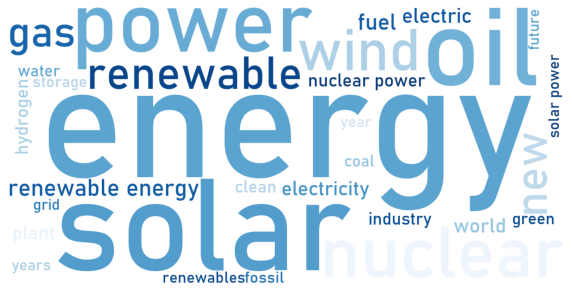


Fig.2: Sample 1 - Cluster 2


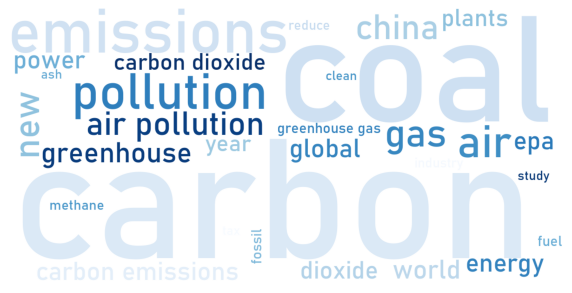


Fig.3: Sample 1 - Cluster 3


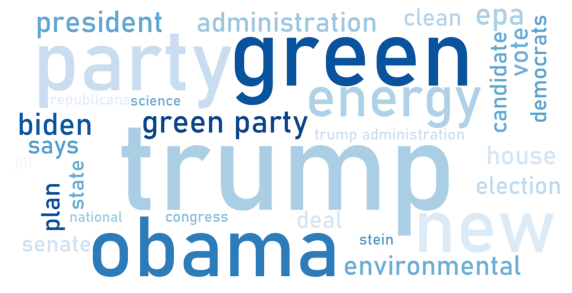


Fig.4: Sample 1 - Cluster 4


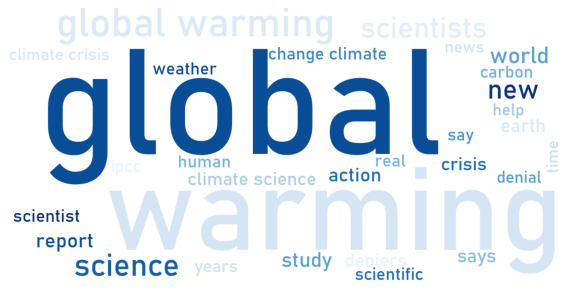


Fig.5: Sample 1 - Cluster 5


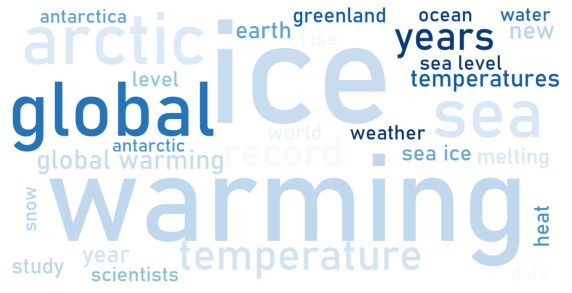


Fig.6: Sample 1 - Cluster 6


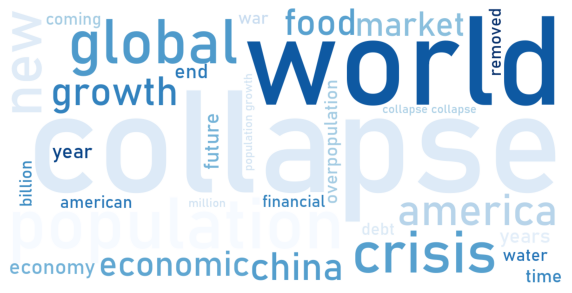


Fig.7: Sample 1 - Cluster 7


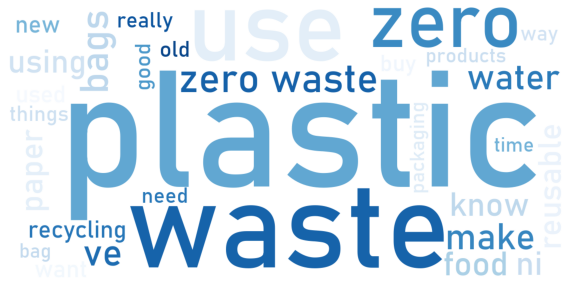


Fig.8: Sample 1 - Cluster 8


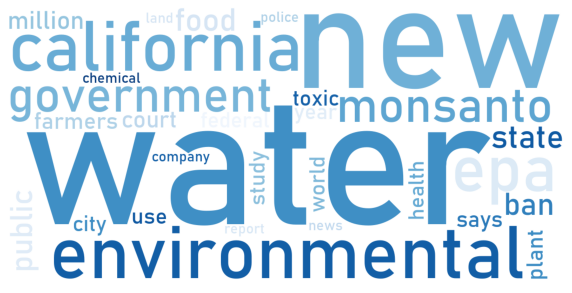


Fig.9: Sample 1 - Cluster 9


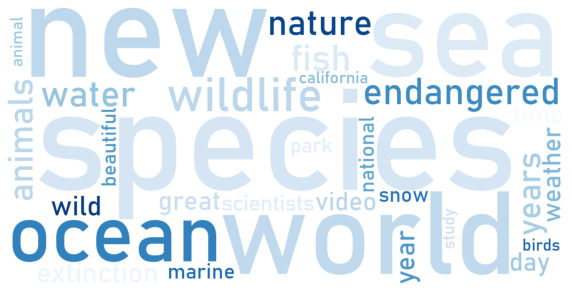


Fig.10: Sample 1 - Cluster 10


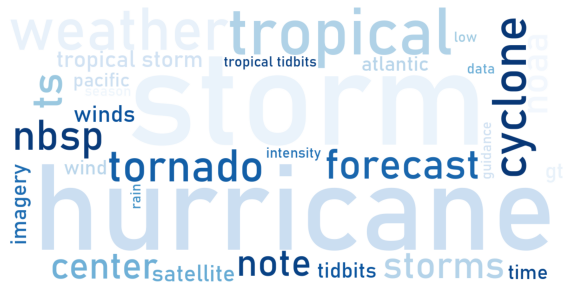


Fig.11: Sample 1 - Cluster 11


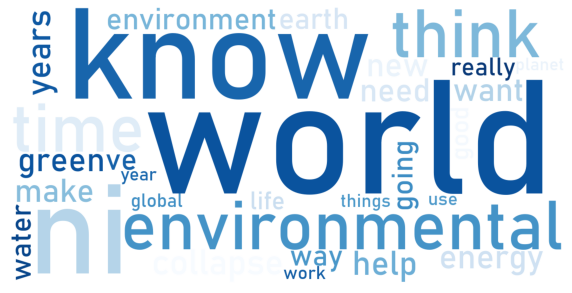


Fig.12: Sample 1 - Cluster 12


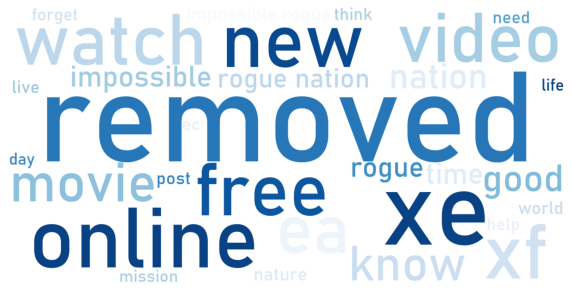

Sample 2 size: 150000


Fig.13: Sample 2 - Cluster 1


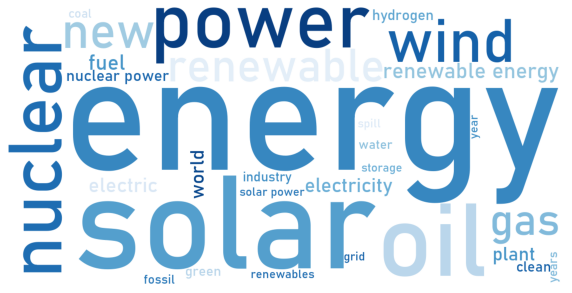


Fig.14: Sample 2 - Cluster 2


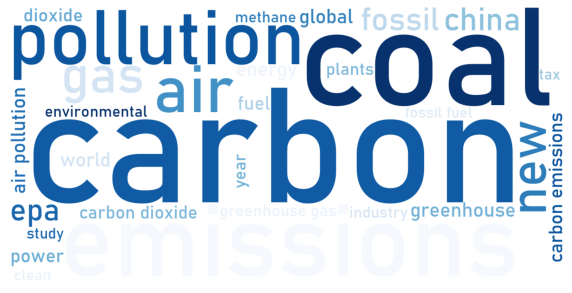


Fig.15: Sample 2 - Cluster 3


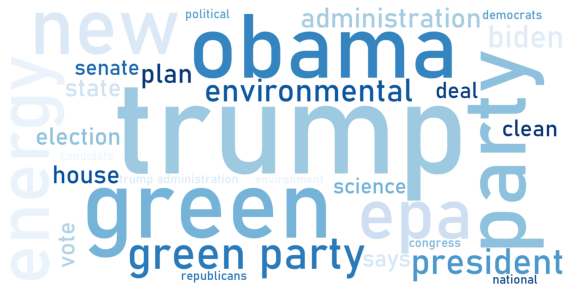


Fig.16: Sample 2 - Cluster 4


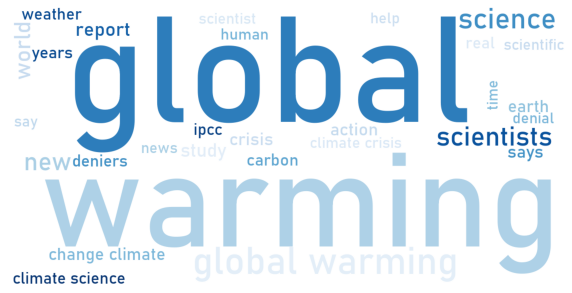


Fig.17: Sample 2 - Cluster 5


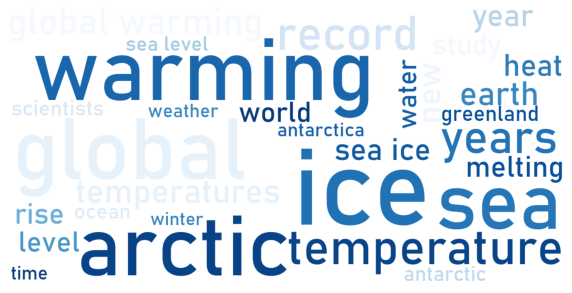


Fig.18: Sample 2 - Cluster 6


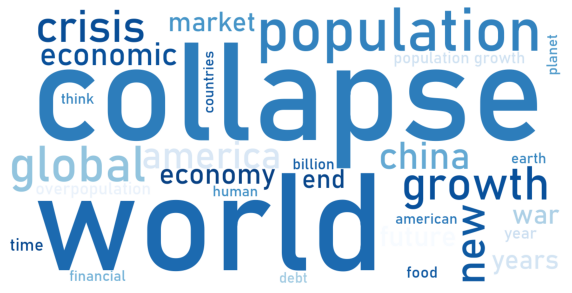


Fig.19: Sample 2 - Cluster 7


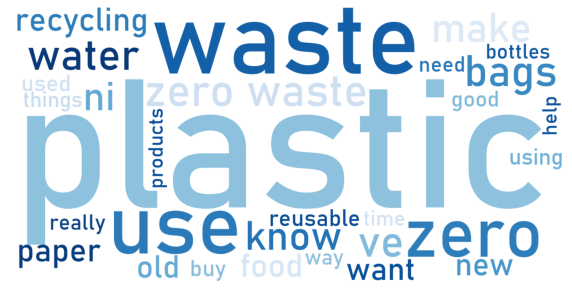


Fig.20: Sample 2 - Cluster 8


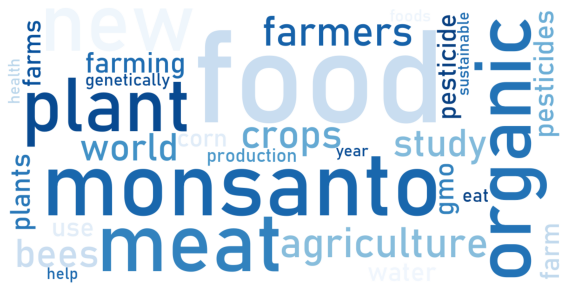


Fig.21: Sample 2 - Cluster 9


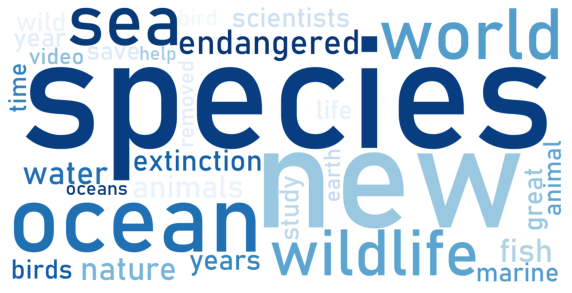


Fig.22: Sample 2 - Cluster 10


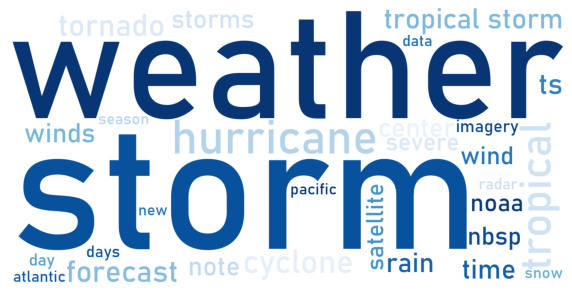


Fig.23: Sample 2 - Cluster 11


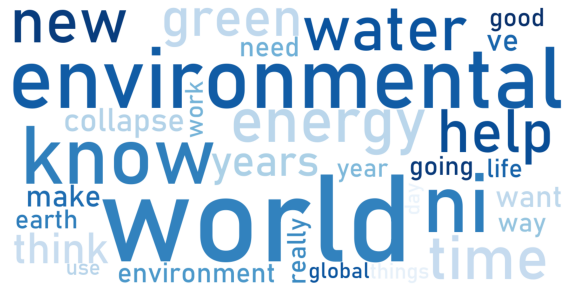


Fig.24: Sample 2 - Cluster 12


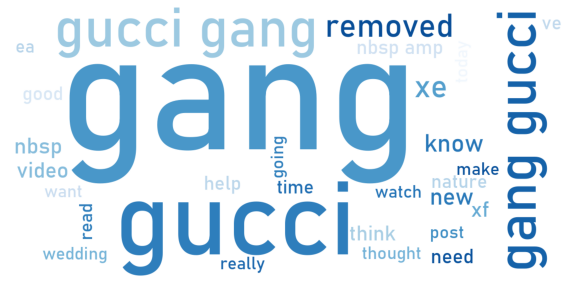

Wall time: 5min 56s


In [2]:
%%time


# Create the function to generate WordClouds
def createWordClouds(sampNo=1,ngram_start=1):   # sampNo refers to "Sample No." and;
                                                # ngram_start refers to the ngram_range parameter in TfidfVectorizer
       
    if ngram_start == 1:
        k = 'Words'
    else:
        k = 'Bigrams'
    
    # Define additional Stopwords
    newWords = ['climate','change','amp','deleted','climate change','don','amp nbsp','don know','people','cunt','cunt cunt']
    newSTOPWORDS = STOPWORDS.union(newWords)
    
    # Load the final lables and merge with preprocessed data
    sample = pd.read_csv(f"FinalLabelsSample{sampNo}.csv")
    
    temp = df.merge(sample, how='inner', left_on='id', right_on='ids')
    temp['date'] = pd.to_datetime(temp['date'])
    temp.set_index('date', inplace=True)
    
    # Check the length of dataframe. It should be 150,000 in this case
    print(f"Sample {sampNo} size: {len(temp)}\n")

    # Run the loop for each cluster and draw generate the word clouds using TfidfVectorizer
    for i in range(1,13):

        clusterdf = temp[temp.labels == i].copy()

        cv = TfidfVectorizer(ngram_range=(ngram_start, 2), stop_words='english')

        # Fit the cleaned data
        cvFit = cv.fit_transform([str(clusterdf['clean_text'].values.tolist())])

        # Obtain list of keywords and their respective count
        wordList = cv.get_feature_names()
        countList = cvFit.toarray().sum(axis=0)

        # Create a dictionary and sort it by count in descending order
        dictionary = dict(zip(wordList, countList))
        dictionary = dict(sorted(dictionary.items(), key=lambda x: x[1], reverse=True))        

        # A function to generate the word cloud from text
        def generate_wordcloud(data):       #, title
            cloud = WordCloud(font_path="C:\\Windows\\Fonts\\Bahnschrift.ttf",
                              width=1200,
                              height=600,
                              max_words=30,
                              colormap='Blues',
                              background_color='white',
                              stopwords=newSTOPWORDS,
                              collocations=True).generate_from_frequencies(data)
            plt.figure(figsize=(10,8))
            plt.imshow(cloud)
            plt.axis('off')
            #plt.title(title, fontsize=22)
            plt.savefig(f"./Plots/WordClouds/Top30{k}/Sample{sampNo}Cluster{i}.png", dpi=1200, bbox_inches="tight")
            plt.show()
        
        # Remove the stopwords from the input dictionary
        for word in newSTOPWORDS:
            if word in dictionary: del dictionary[word]
                
        # Generate the final WordCloud
        createWordClouds.count+=1
        print(f"\nFig.{createWordClouds.count}: Sample {sampNo} - Cluster {i}")
        generate_wordcloud(dictionary)

# Assign a property count to the function to count the number of wordclouds generated
createWordClouds.count = 0


# Run the function to generate Top30Words wordclouds for all 12 clusters within each Sample 1 & 2
# Top30Words pertain to a list of top 30 unigrams or bigrams by count
createWordClouds()
createWordClouds(sampNo=2)


Sample 1 size: 150000


Fig.25: Sample 1 - Cluster 1


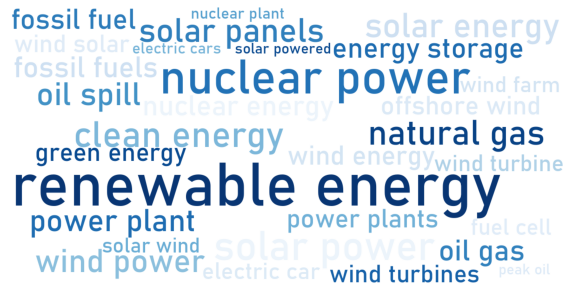


Fig.26: Sample 1 - Cluster 2


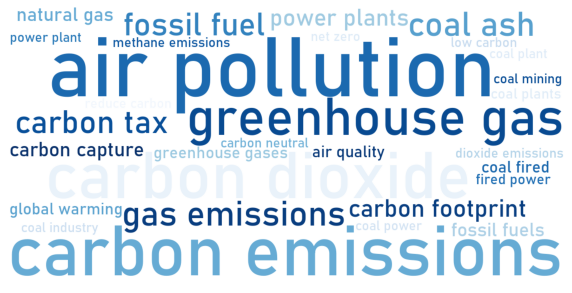


Fig.27: Sample 1 - Cluster 3


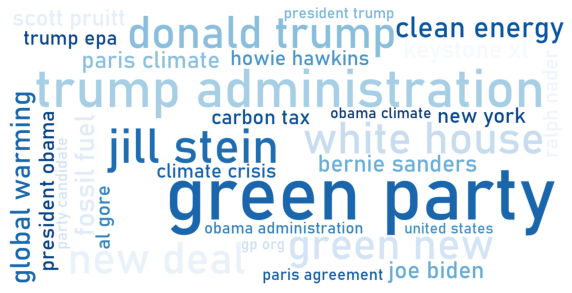


Fig.28: Sample 1 - Cluster 4


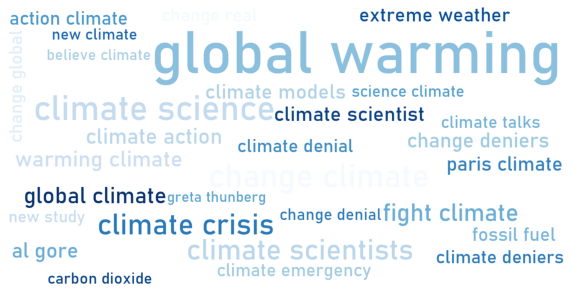


Fig.29: Sample 1 - Cluster 5


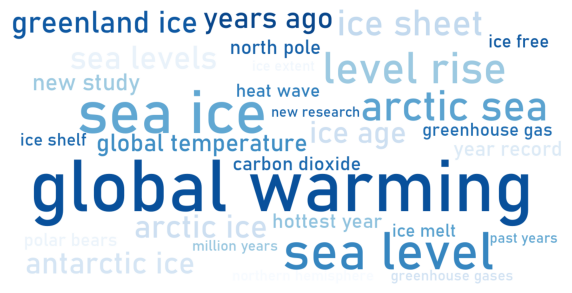


Fig.30: Sample 1 - Cluster 6


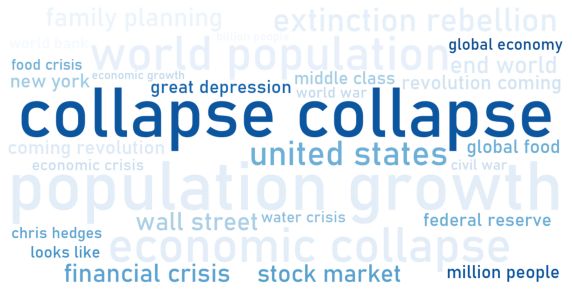


Fig.31: Sample 1 - Cluster 7


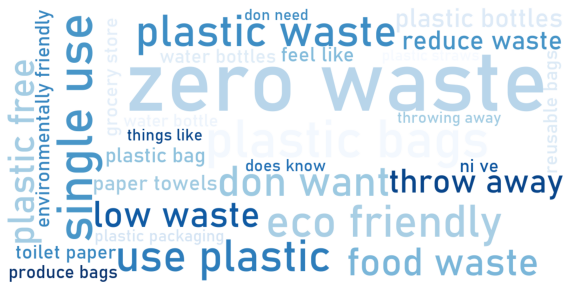


Fig.32: Sample 1 - Cluster 8


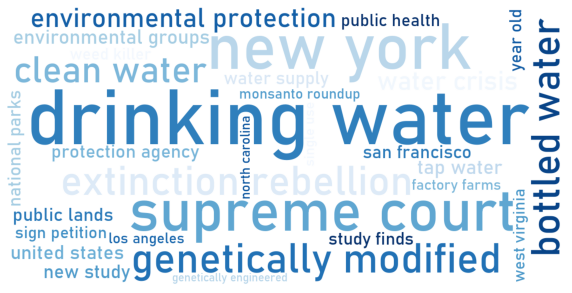


Fig.33: Sample 1 - Cluster 9


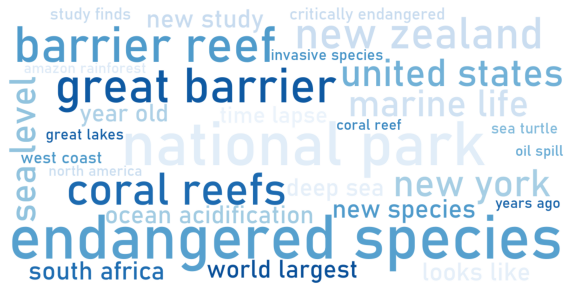


Fig.34: Sample 1 - Cluster 10


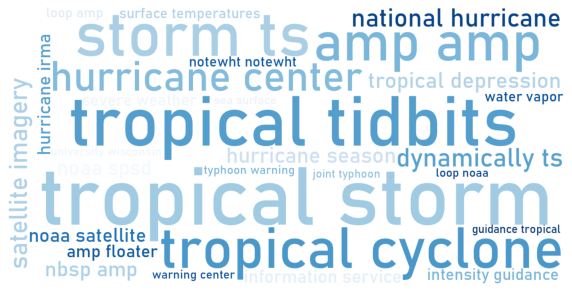


Fig.35: Sample 1 - Cluster 11


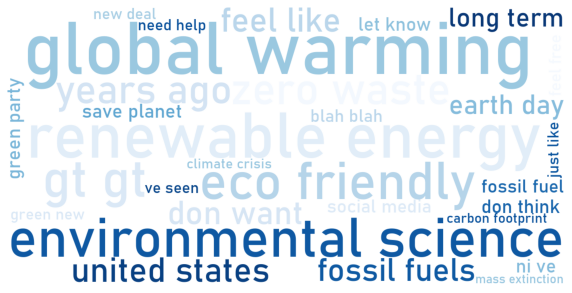


Fig.36: Sample 1 - Cluster 12


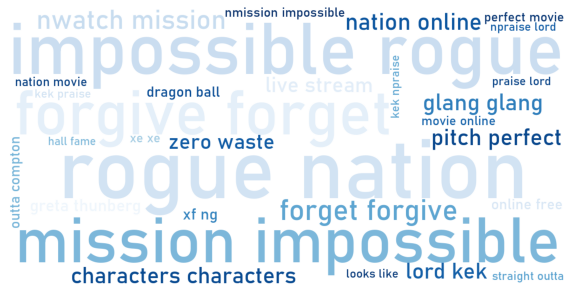

Sample 2 size: 150000


Fig.37: Sample 2 - Cluster 1


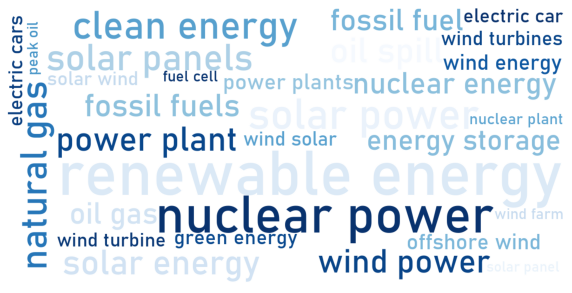


Fig.38: Sample 2 - Cluster 2


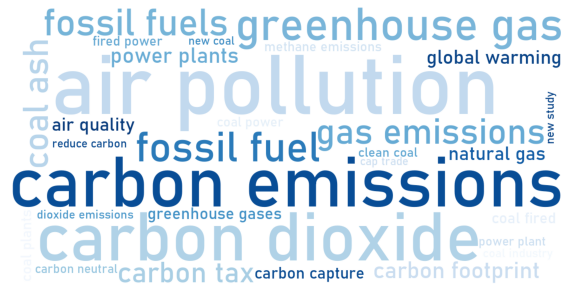


Fig.39: Sample 2 - Cluster 3


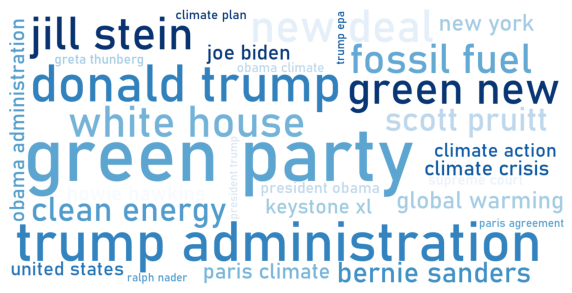


Fig.40: Sample 2 - Cluster 4


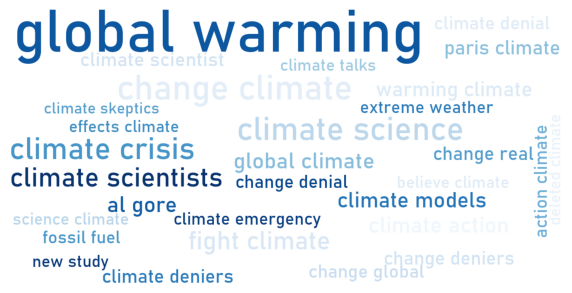


Fig.41: Sample 2 - Cluster 5


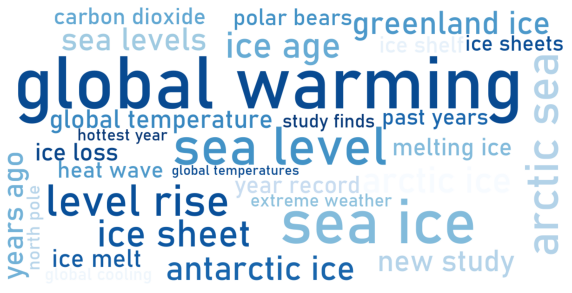


Fig.42: Sample 2 - Cluster 6


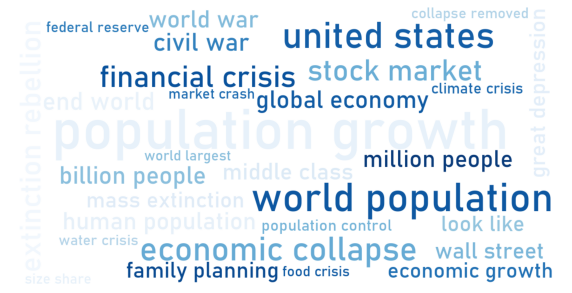


Fig.43: Sample 2 - Cluster 7


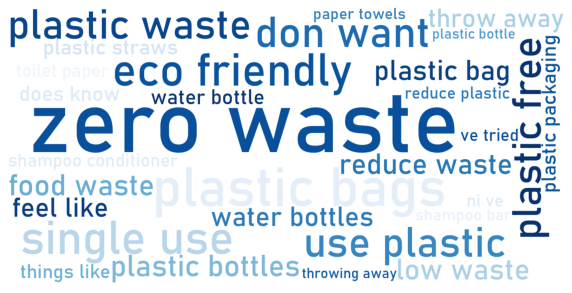


Fig.44: Sample 2 - Cluster 8


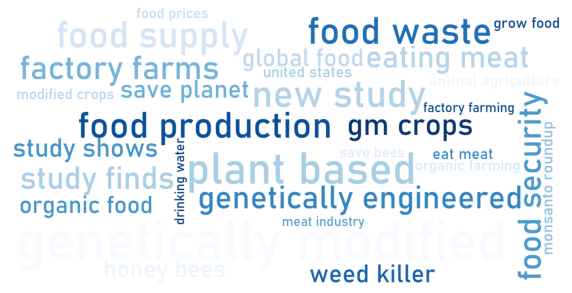


Fig.45: Sample 2 - Cluster 9


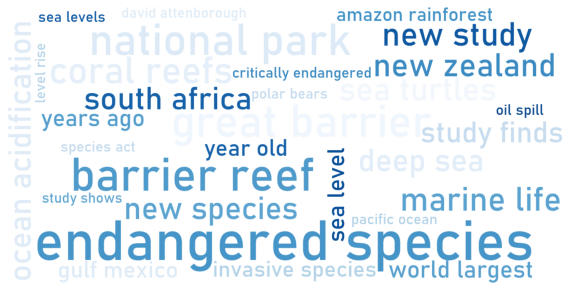


Fig.46: Sample 2 - Cluster 10


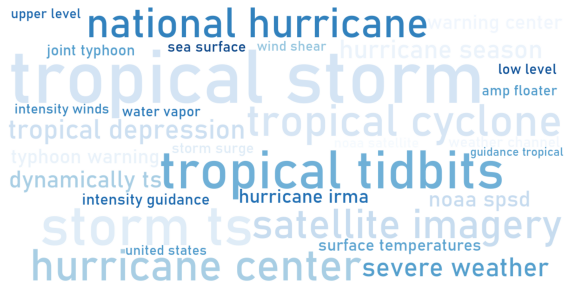


Fig.47: Sample 2 - Cluster 11


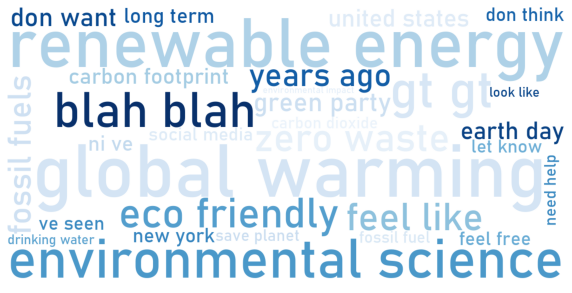


Fig.48: Sample 2 - Cluster 12


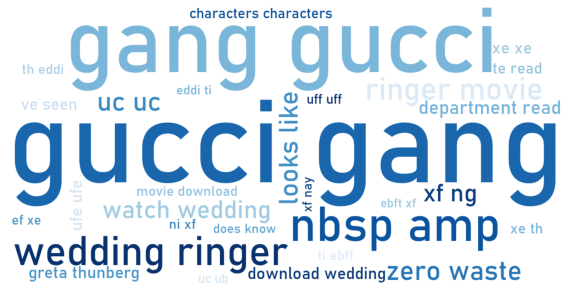

In [3]:
# Run the function to generate Top30Bigrams wordclouds for all 12 clusters within each Sample 1 & 2
createWordClouds(ngram_start=2)
createWordClouds(sampNo=2,ngram_start=2)
